# **problem statment**

Prform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

# **Importing Libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Importing Dataset**

In [3]:
df=pd.read_csv('crime_data.csv')

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df1=df.copy()

In [6]:
df1.columns=['City','Murder','Assault',"Urbanpop",'Rape']

In [7]:
df1.loc[:,"Total"] = df1.sum(numeric_only = True, axis = 1)

In [8]:
df1.head()

,City,Murder,Assault,Urbanpop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6


# **Performing EDA**

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   Urbanpop  50 non-null     int64  
 4   Rape      50 non-null     float64
 5   Total     50 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.5+ KB


In [10]:
df1.isnull().sum()

City        0
Murder      0
Assault     0
Urbanpop    0
Rape        0
Total       0
dtype: int64

**So as we can see above there are no null values in our dataset.**

In [11]:
df1.describe()

,Murder,Assault,Urbanpop,Rape,Total
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,265.320000
std,4.35551,83.337661,14.474763,9.366385,98.350844
min,0.80000,45.000000,32.000000,7.300000,93.400000
25%,4.07500,109.000000,54.500000,15.075000,187.950000
50%,7.25000,159.000000,66.000000,20.100000,257.450000
75%,11.25000,249.000000,77.750000,26.175000,348.500000
max,17.40000,337.000000,91.000000,46.000000,462.300000


<Axes: >

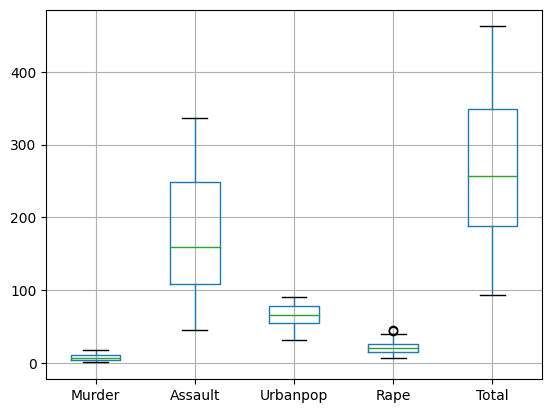

In [12]:
df1.boxplot()

**So from the above plot we can conclude that there are no outliers in the dataset.**

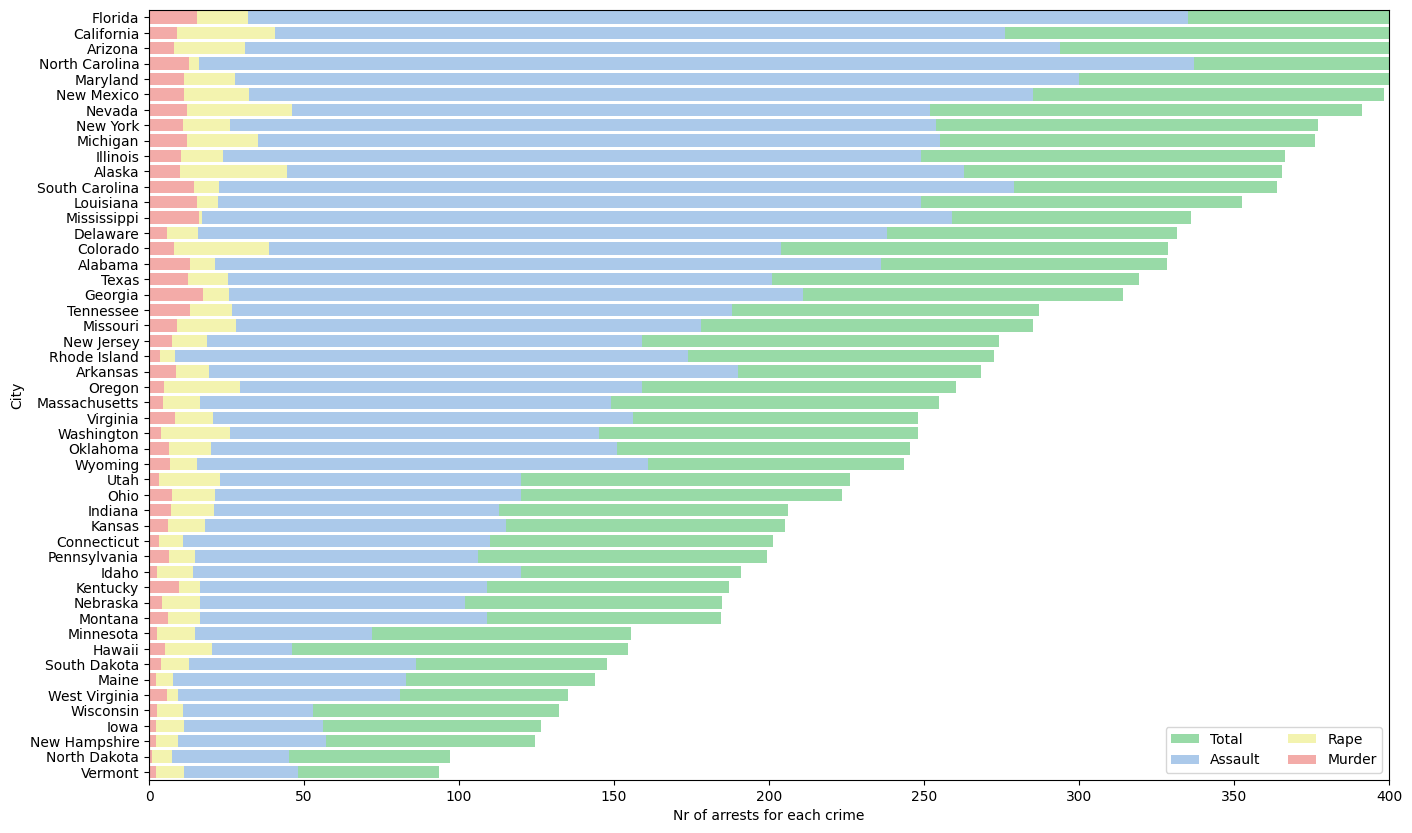

In [13]:
f, ax = plt.subplots(figsize=(16, 10))

stats = df1.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="City", data=stats,
            label="Total", color="g")

sns.barplot(x="Assault", y="City", data=stats,
            label="Assault", color="b")

sns.barplot(x="Rape", y="City", data=stats,
            label="Rape", color="y")

sns.barplot(x="Murder", y="City", data=stats,
            label="Murder", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="City",
       xlabel="Nr of arrests for each crime");

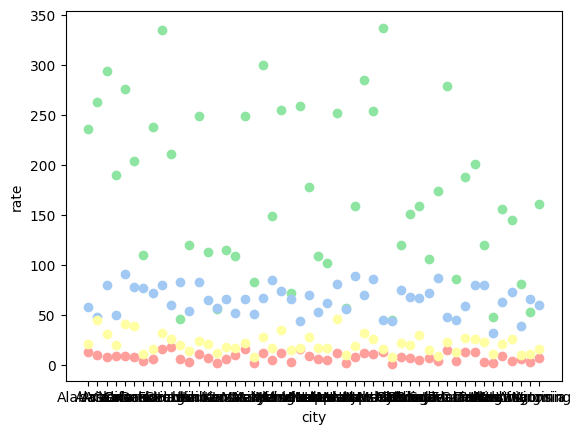

In [14]:
plt.scatter(df1.City, df1.Murder, color='r')
plt.scatter(df1.City, df1.Assault, color='g')
plt.scatter(df1.City, df1.Urbanpop, color='b')
plt.scatter(df1.City, df1.Rape, color='y')
plt.xlabel('city')
plt.ylabel('rate')
plt.show()

**From the above plots we will get to know that there are high rate and more number of arrest for the Assault variable.**

# **Standarize the data**

In [15]:
X = df1[['Murder','Assault','Rape','Urbanpop']]

In [16]:
X

,Murder,Assault,Rape,Urbanpop
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91
5,7.9,204,38.7,78
6,3.3,110,11.1,77
7,5.9,238,15.8,72
8,15.4,335,31.9,80
9,17.4,211,25.8,60


In [17]:
scalar=MinMaxScaler()
scaled_df=scalar.fit_transform(X)

In [18]:
print(scaled_df)

[[0.74698795 0.65410959 0.35917313 0.44067797]
 [0.55421687 0.74657534 0.96124031 0.27118644]
 [0.43975904 0.85273973 0.6124031  0.81355932]
 [0.48192771 0.49657534 0.31524548 0.30508475]
 [0.4939759  0.79109589 0.86046512 1.        ]
 [0.42771084 0.54452055 0.81136951 0.77966102]
 [0.15060241 0.22260274 0.09819121 0.76271186]
 [0.30722892 0.6609589  0.21963824 0.6779661 ]
 [0.87951807 0.99315068 0.63565891 0.81355932]
 [1.         0.56849315 0.47803618 0.47457627]
 [0.27108434 0.00342466 0.33333333 0.86440678]
 [0.10843373 0.25684932 0.17829457 0.37288136]
 [0.57831325 0.69863014 0.43152455 0.86440678]
 [0.38554217 0.23287671 0.35400517 0.55932203]
 [0.08433735 0.03767123 0.10335917 0.42372881]
 [0.31325301 0.23972603 0.27648579 0.57627119]
 [0.53614458 0.21917808 0.23255814 0.33898305]
 [0.87951807 0.69863014 0.38501292 0.57627119]
 [0.07831325 0.13013699 0.0129199  0.3220339 ]
 [0.63253012 0.87328767 0.52971576 0.59322034]
 [0.21686747 0.35616438 0.23255814 0.89830508]
 [0.68072289 

In [19]:
scaled_df1=pd.DataFrame(scaled_df,columns=X.columns)
scaled_df1.head()  

,Murder,Assault,Rape,Urbanpop
0,0.746988,0.654110,0.359173,0.440678
1,0.554217,0.746575,0.961240,0.271186
2,0.439759,0.852740,0.612403,0.813559
3,0.481928,0.496575,0.315245,0.305085
4,0.493976,0.791096,0.860465,1.000000


# **Hierarchical Clustering**

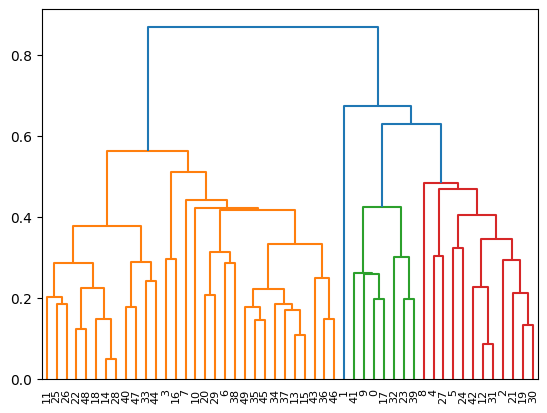

In [20]:
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method='average'))

**We decided to cut the tree at height 0.6 to obtain 4 clusters and then assigned each cluster with its respective observations.**

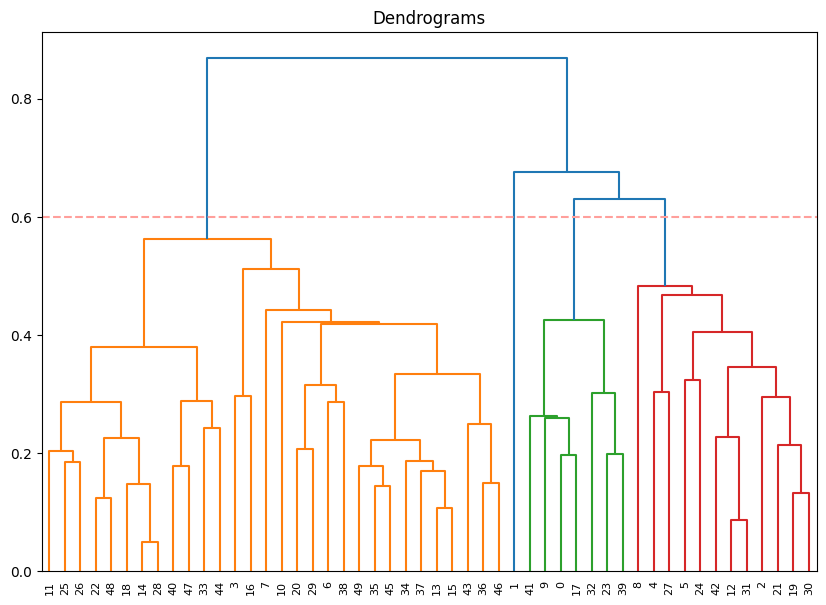

In [21]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(scaled_df, method='average'))
plt.axhline(y=0.6, color='r', linestyle='--')
plt.show()

In [22]:
hc=AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage='average') 

In [23]:
hc_pred=hc.fit_predict(scaled_df1)  

In [24]:
hc_pred

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0])

In [25]:
df2=df1.copy()
df2['cluster_no']=pd.DataFrame(hc_pred,columns=['cluster_no'])


In [26]:
df2

,City,Murder,Assault,Urbanpop,Rape,Total,cluster_no
0,Alabama,13.2,236,58,21.2,328.4,3
1,Alaska,10.0,263,48,44.5,365.5,2
2,Arizona,8.1,294,80,31.0,413.1,1
3,Arkansas,8.8,190,50,19.5,268.3,0
4,California,9.0,276,91,40.6,416.6,1
5,Colorado,7.9,204,78,38.7,328.6,1
6,Connecticut,3.3,110,77,11.1,201.4,0
7,Delaware,5.9,238,72,15.8,331.7,0
8,Florida,15.4,335,80,31.9,462.3,1
9,Georgia,17.4,211,60,25.8,314.2,3


# **Kmeans Clustering**

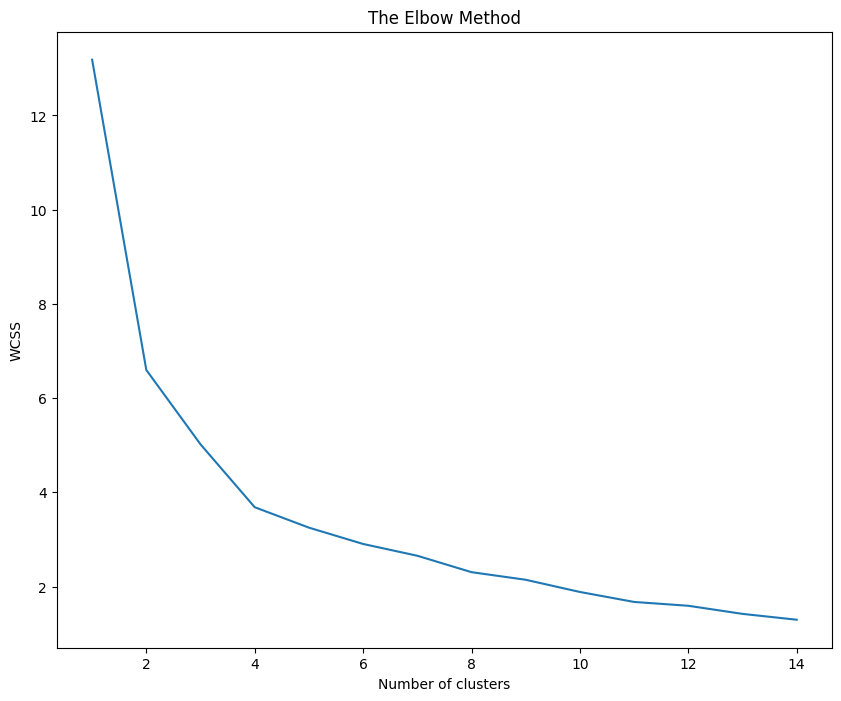

In [27]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_df1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**By seeing that we will get to know that the optimum number of clusters are 4.so lets define the cluster.**

In [28]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_df1)

In [29]:
y_kmeans

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3], dtype=int32)

In [30]:
y_kmeans1=y_kmeans
cluster = list(y_kmeans1)

In [31]:
df1['cluster'] = cluster

In [32]:
kmeans_mean_cluster = pd.DataFrame(round(df1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,Urbanpop,Rape,Total
cluster,,,,,
0,3.6,78.5,52.1,12.2,146.4
1,11.0,264.0,76.5,33.6,385.1
2,13.9,243.6,53.8,21.4,332.7
3,5.9,141.2,73.6,19.3,240.0


<Axes: xlabel='Murder', ylabel='Assault'>

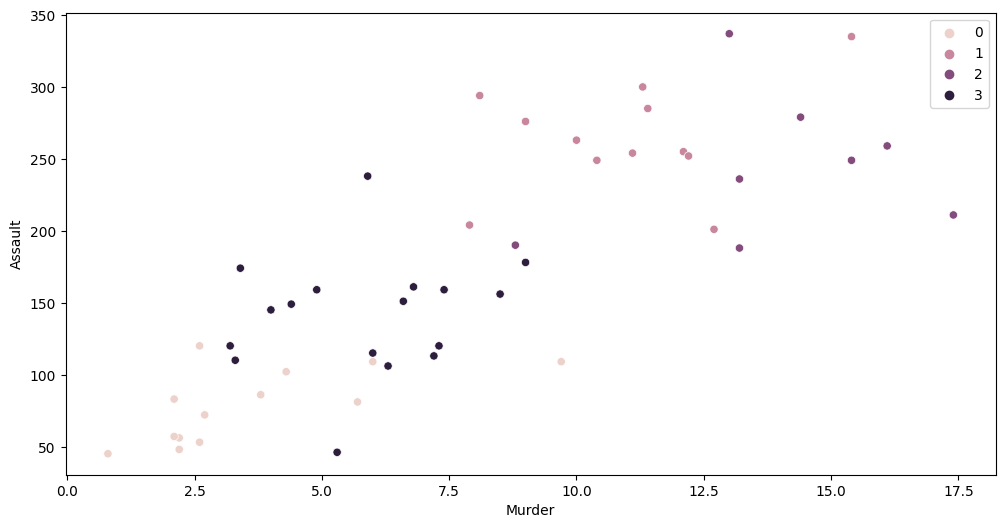

In [33]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df1['Murder'], y = df1['Assault'],hue=y_kmeans1)

**The above scatter shows a distribution of how the states are scattered and clusters are visible based on Murders and Assaults. And there is a positive correlation between occurrence of Murder and Assault in different states.**

<Axes: xlabel='Murder', ylabel='Rape'>

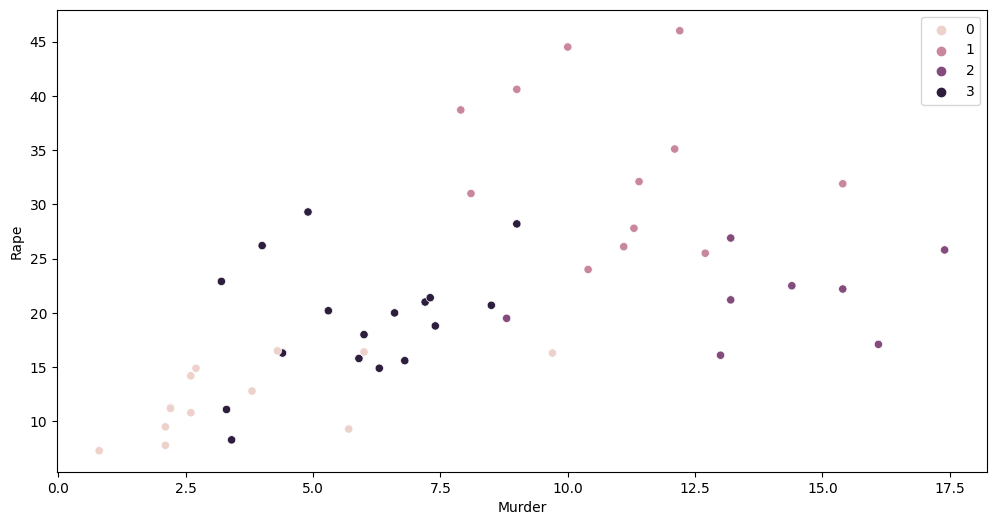

In [34]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df1['Murder'], y = df1['Rape'],hue=y_kmeans1)

<Axes: xlabel='Rape', ylabel='Assault'>

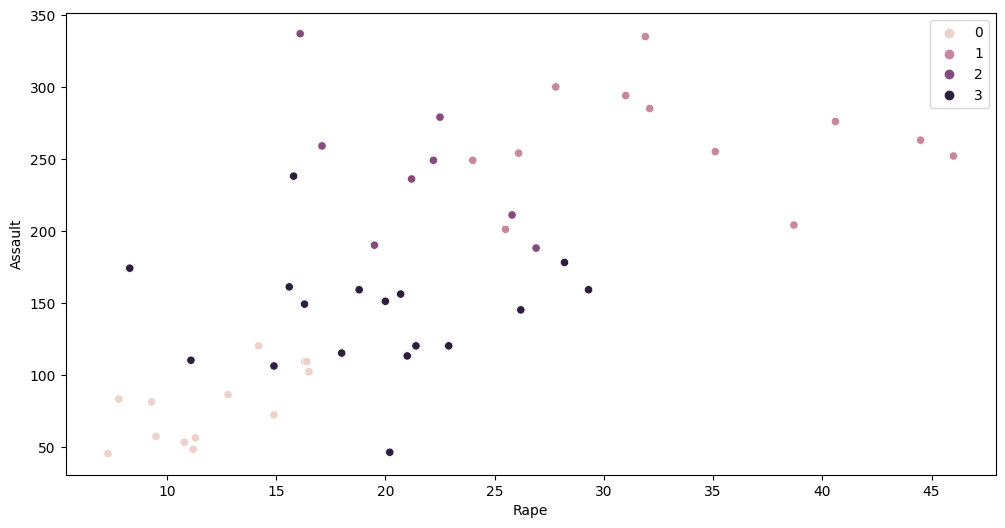

In [35]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df1['Rape'], y = df1['Assault'],hue=y_kmeans1)

In [36]:
stats = df1.sort_values("Total", ascending=True)
df1_total= pd.DataFrame(stats)

In [37]:
df1_total

,City,Murder,Assault,Urbanpop,Rape,Total,cluster
44,Vermont,2.2,48,32,11.2,93.4,0
33,North Dakota,0.8,45,44,7.3,97.1,0
28,New Hampshire,2.1,57,56,9.5,124.6,0
14,Iowa,2.2,56,57,11.3,126.5,0
48,Wisconsin,2.6,53,66,10.8,132.4,0
47,West Virginia,5.7,81,39,9.3,135.0,0
18,Maine,2.1,83,51,7.8,143.9,0
40,South Dakota,3.8,86,45,12.8,147.6,0
10,Hawaii,5.3,46,83,20.2,154.5,3
22,Minnesota,2.7,72,66,14.9,155.6,0


**Conclusion :**

**Cluster 3 - south western states maxes out in three (Assault, Urbanpop, Rape) out of four crimes.**

**Cluster 4 stands out for minimum crime rate as the means of 3 crimes are least relative to other crimes**

**Coincidentally, most of the southern region states belong to cluster 2 where Murders seems to be popular.**

**The southern states in cluster 4 have more number of average arrests/ 100,000 persons in all the three crime categories than states in cluster 2 in spite of the average Urbanpop (%) being very close.**

# **DBSCAN Clustering**

It is an Density Based Spatial clustering for the Application with noise.

In [49]:
dbscan=DBSCAN(eps=0.5,min_samples=5)
dbscan.fit(scaled_df1)

DBSCAN()

In [50]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [51]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [52]:
clustered=pd.concat([df.copy(),cl],axis=1)
clustered

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


**So according to the DBSCAN clustering we will get to know that the second record is noisy.**